In [1]:
import pandas as pd

df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [2]:

## Data cleaning including missing values, outliers and multi-collinearity. 

In [3]:
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("======= info ==========")
df.info()
print("======= duplicate data or not ==========")
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")
print("=======null values or not ==========")
df.isnull().sum()


======= info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
======= duplicate data or not ==========

Number of duplicate rows: 0
=======null values or not ==========


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

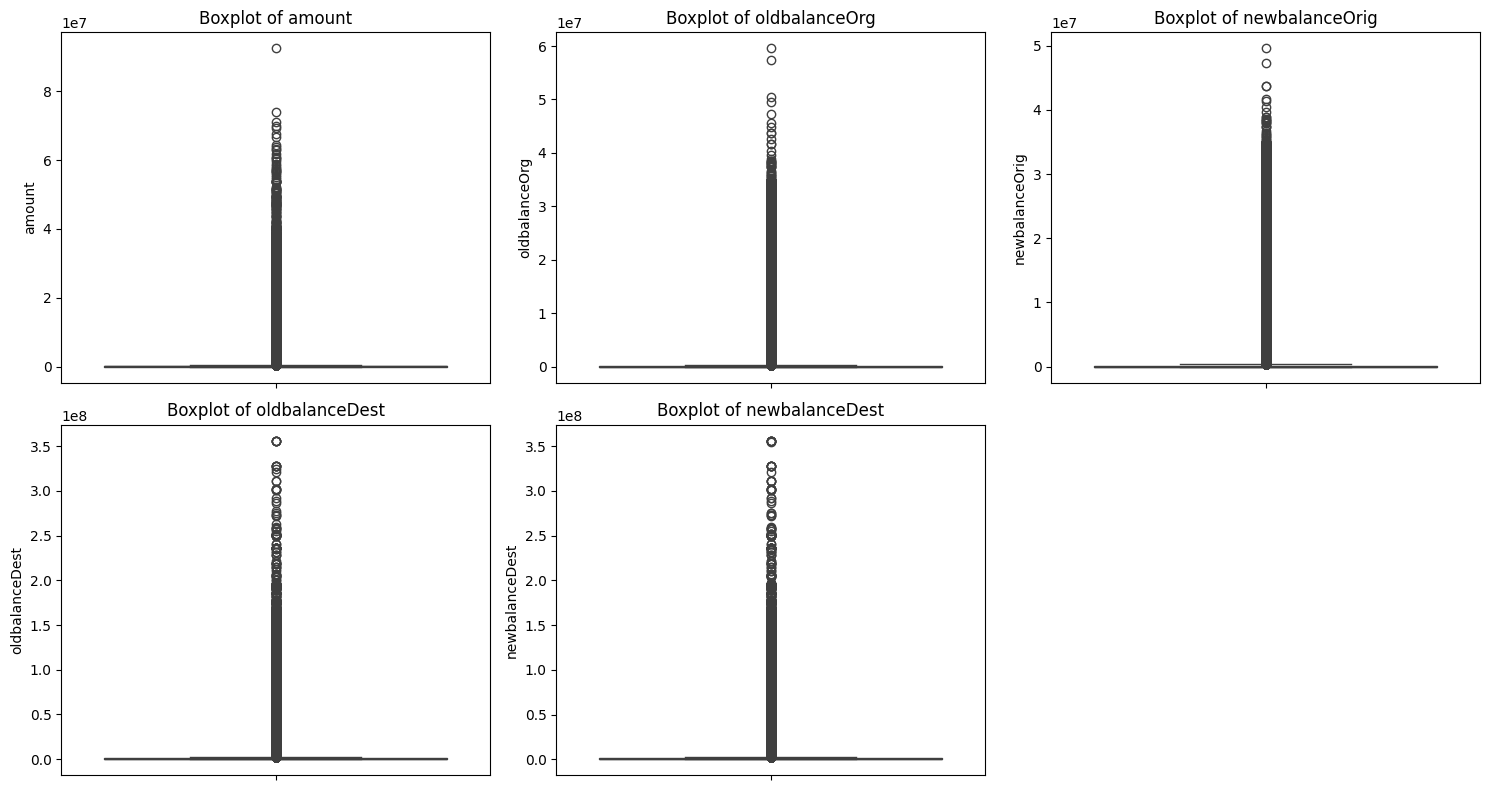


Number of Outliers per Column:
amount: 338078 outliers
oldbalanceOrg: 1112507 outliers
newbalanceOrig: 1053391 outliers
oldbalanceDest: 786135 outliers
newbalanceDest: 738527 outliers


In [4]:
# here we check outlers 
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

print("\nNumber of Outliers per Column:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")



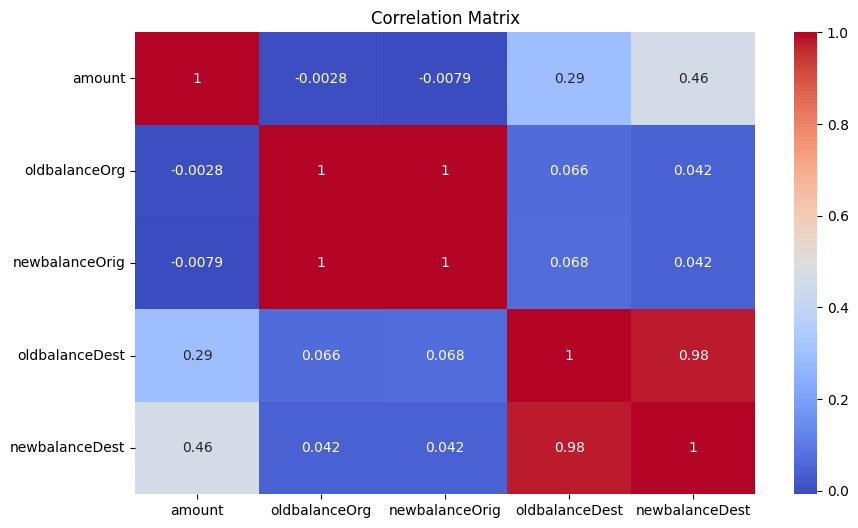


High Correlation Pairs (|correlation| > 0.8):
newbalanceOrig and oldbalanceOrg: 1.00
oldbalanceOrg and newbalanceOrig: 1.00
newbalanceDest and oldbalanceDest: 0.98
oldbalanceDest and newbalanceDest: 0.98


In [5]:
# here we check multicollinearity 

plt.figure(figsize=(10, 6))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
threshold = 0.8
high_corr = correlation[(abs(correlation) > threshold) & (correlation != 1.0)]

print("\nHigh Correlation Pairs (|correlation| > 0.8):")
for col in high_corr.columns:
    for row in high_corr.index:
        if not np.isnan(high_corr.loc[row, col]):
            print(f"{row} and {col}: {high_corr.loc[row, col]:.2f}")



In [6]:
from sklearn.preprocessing import LabelEncoder

# Step 5: Feature Engineering
df['balanceOrigChange'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDestChange'] = df['newbalanceDest'] - df['oldbalanceDest']

# Step 6: Encode categorical column 'type'
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Preview the processed data
print(df.head())


   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     3   9839.64  C1231006815       170136.0       160296.36   
1     1     3   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     3  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2   C553264065             0.0             0.0        1               0   
3    C38997010         21182.0             0.0        1               0   
4  M1230701703             0.0             0.0        0               0   

   balanceOrigChange  balanceDestChange  
0            9839.64                0.0  
1            1864.28                0.

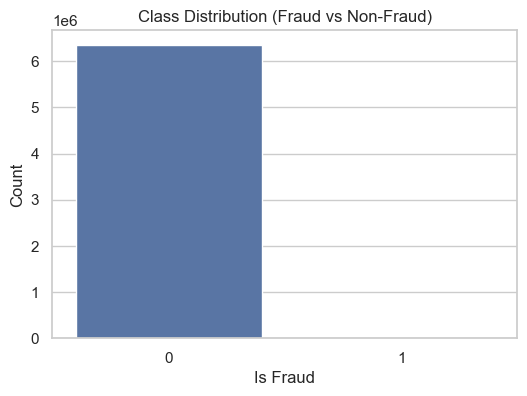

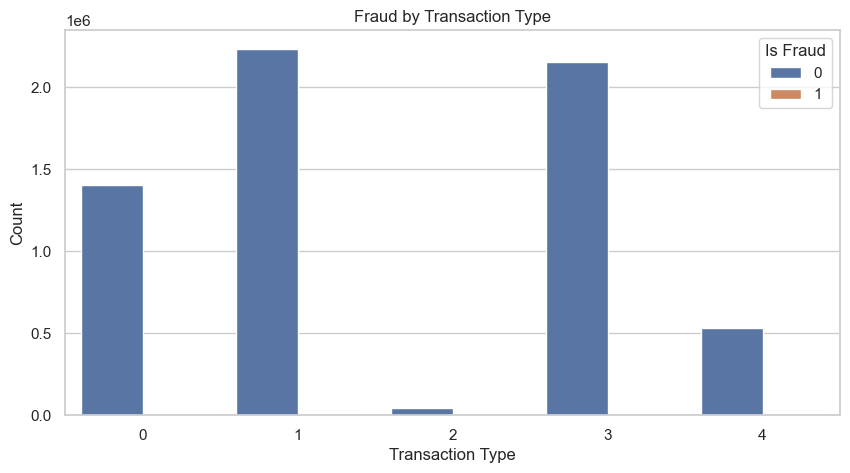

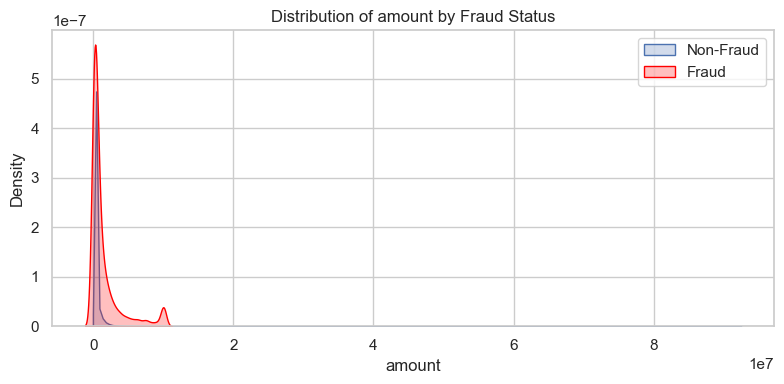

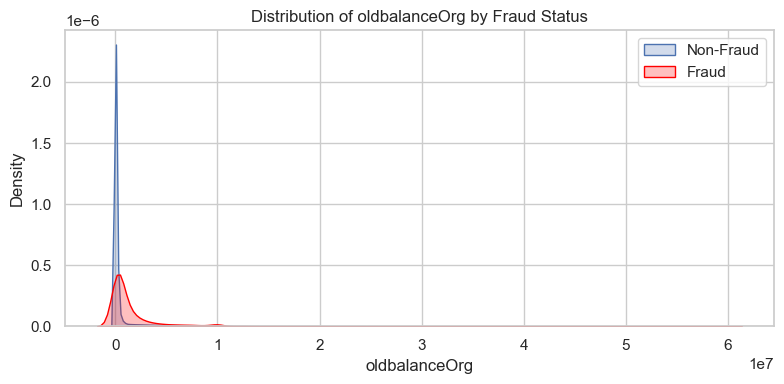

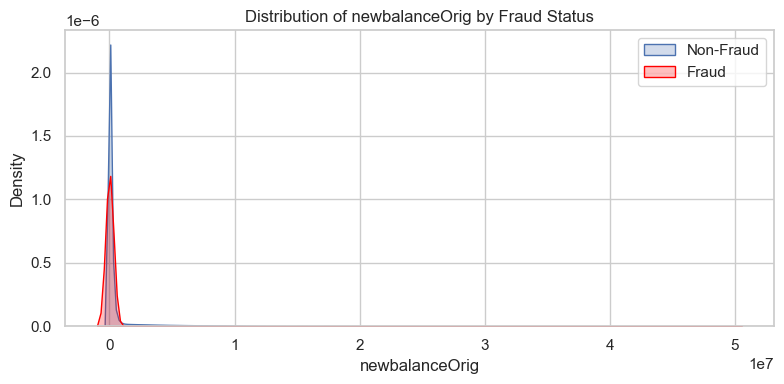

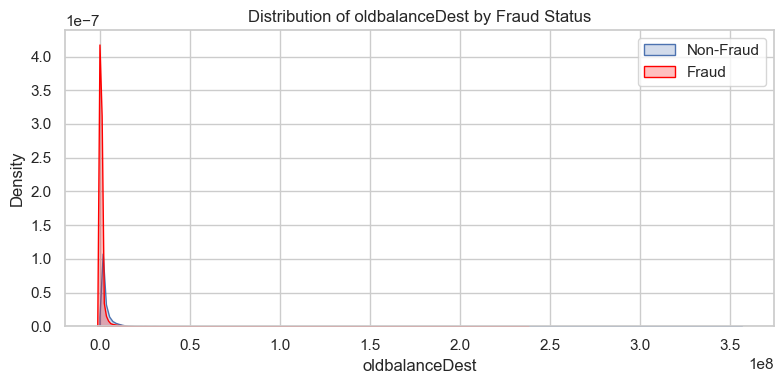

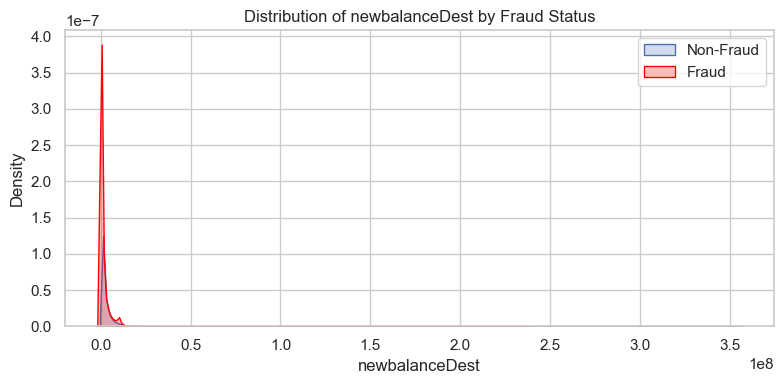

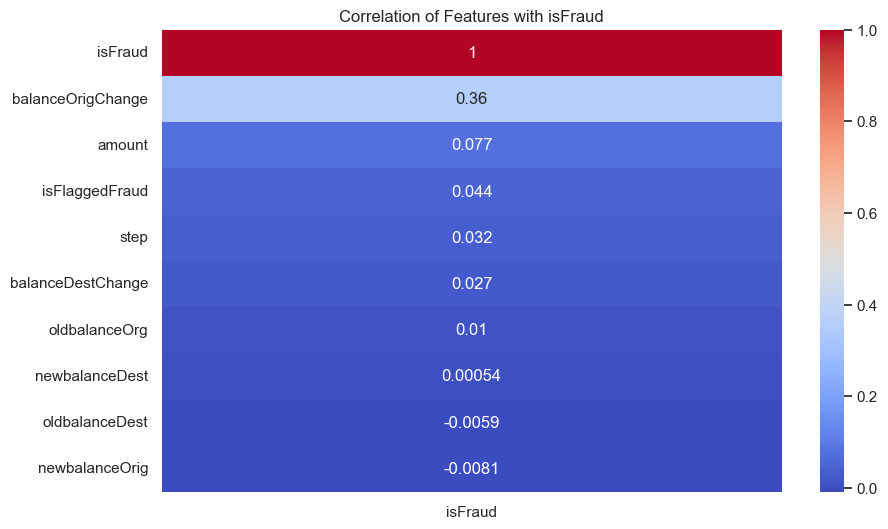

In [7]:
# Set style
sns.set(style="whitegrid")

# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# 2. Fraud distribution across transaction type
plt.figure(figsize=(10, 5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

# 3. Compare fraud vs. non-fraud for numeric features
# Update this list to ensure it only contains numeric columns
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plot KDE for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df[df['isFraud'] == 0], x=feature, label='Non-Fraud', fill=True)
    sns.kdeplot(data=df[df['isFraud'] == 1], x=feature, label='Fraud', fill=True, color='red')
    plt.title(f'Distribution of {feature} by Fraud Status')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 4. Correlation Matrix with isFraud
# Ensure we exclude non-numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
corr = numeric_data.corr()
sns.heatmap(corr[['isFraud']].sort_values(by='isFraud', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with isFraud')
plt.show()


Sampled data shape: (63626, 13)
Original class distribution: 
isFraud
0    50830
1       70
Name: count, dtype: int64
Class distribution after SMOTE: 
isFraud
0    50830
1    50830
Name: count, dtype: int64


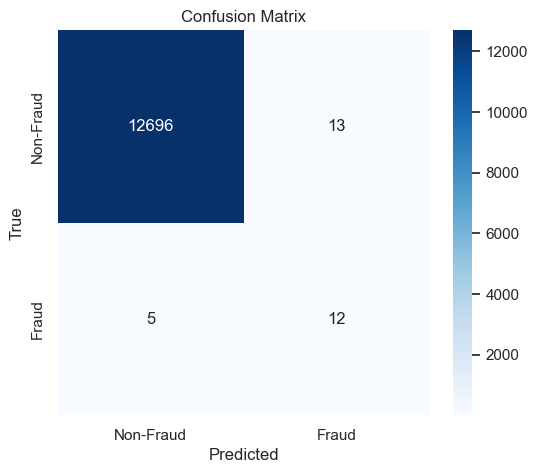

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12709
           1       0.48      0.71      0.57        17

    accuracy                           1.00     12726
   macro avg       0.74      0.85      0.79     12726
weighted avg       1.00      1.00      1.00     12726

ROC-AUC Score: 0.9986484797711672


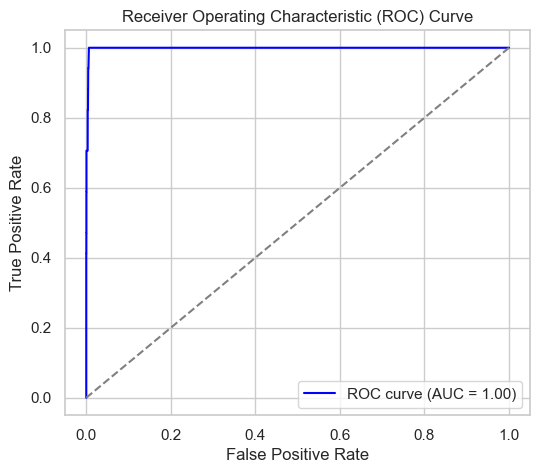

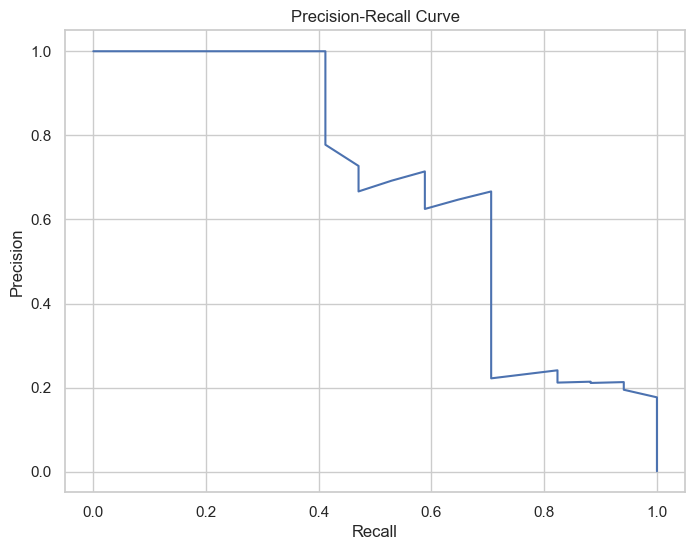

Feature Importances:
             Feature  Importance
8  balanceOrigChange    0.318682
3      oldbalanceOrg    0.183543
4     newbalanceOrig    0.159281
2             amount    0.089925
9  balanceDestChange    0.077496
1               type    0.071332
6     newbalanceDest    0.051160
0               step    0.028354
5     oldbalanceDest    0.020227
7     isFlaggedFraud    0.000000


In [8]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sample a smaller subset for testing (1% of the data) to reduce memory usage
df_sampled = df.sample(frac=0.01, random_state=42)  # Adjust the fraction based on memory capacity
print(f'Sampled data shape: {df_sampled.shape}')

# Step 2: Separate features and target variable
X = df_sampled.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)  # Drop non-numeric columns
y = df_sampled['isFraud']

# Step 3: Encode categorical features (e.g., 'type') if needed
label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 6: Check the new class distribution after SMOTE
print(f'Original class distribution: \n{y_train.value_counts()}')
print(f'Class distribution after SMOTE: \n{y_train_res.value_counts()}')

# Step 7: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Step 8: Make Predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 9: Model Evaluation

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importances
feature_importances = rf_model.feature_importances_
feat_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feat_importances_df)


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Step 1: Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 2: Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)

# Step 4: Display the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Step 5: Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Step 6: Evaluate the tuned model using cross-validation
cross_val_scores = cross_val_score(best_rf_model, X_train_res, y_train_res, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

# Step 7: Make Predictions using the tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Step 8: Evaluate the tuned model
# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Tuned Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# ROC-AUC Score
roc_auc_tuned = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f'Tuned ROC-AUC Score: {roc_auc_tuned}')

# ROC Curve
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 5))
plt.plot(fpr_tuned, tpr_tuned, color='blue', label=f'ROC curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importances for the Tuned Model
feature_importances_tuned = best_rf_model.feature_importances_
feat_importances_df_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_tuned
}).sort_values(by='Importance', ascending=False)

print("Tuned Feature Importances:")
print(feat_importances_df_tuned)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load('fraud_detection_rf_model.pkl')

# Load label encoder (important for encoding categorical variables consistently)
label_encoder = joblib.load('label_encoder.pkl')  # Assuming label_encoder was saved

# Define the function to process input and make predictions
def predict_fraud():
    # Get user input
    print("Please enter the following details for the transaction:")
    
    type_input = input("Enter the type of transaction (e.g., CASH_IN, CASH_OUT, DEBIT, CREDIT): ")
    amount_input = float(input("Enter the transaction amount: "))
    oldbalanceOrg_input = float(input("Enter the old balance of the origin account: "))
    newbalanceOrig_input = float(input("Enter the new balance of the origin account: "))
    oldbalanceDest_input = float(input("Enter the old balance of the destination account: "))
    newbalanceDest_input = float(input("Enter the new balance of the destination account: "))
    
    # Encoded type
    type_encoded = label_encoder.transform([type_input])[0]
    
    # Create a DataFrame from the user input
    user_data = pd.DataFrame({
        'type': [type_encoded],
        'amount': [amount_input],
        'oldbalanceOrg': [oldbalanceOrg_input],
        'newbalanceOrig': [newbalanceOrig_input],
        'oldbalanceDest': [oldbalanceDest_input],
        'newbalanceDest': [newbalanceDest_input],
    })
    
    # Make prediction using the trained model
    prediction = model.predict(user_data)
    
    # Return result to the user
    if prediction == 1:
        print("The transaction is FRAUD.")
    else:
        print("The transaction is NOT fraud.")

# Call the function to let the user input data
predict_fraud()
